In [143]:
import re
import pandas as pd

In [144]:
f = open("dataset/IOS_Casa DDD-7.txt",'r',encoding='utf-8')

In [145]:
data = f.read()
data

"[22/09/22, 3:17:55\u202fAM] Casa DDD-7: \u200eMessages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.\n[22/09/22, 3:17:55\u202fAM] Casa DDD-7: \u200eYou created this group\n[11/10/22, 6:08:08\u202fPM] Udit Khanna: Hello CGCIANS 😍\nWe are delighted to inform you that CGC is organising Parivartan 2k22 and you have chance to vote for your favourite singer from the given link.\n\nhttps://forms.gle/UDH8WbXb1CG4HqeA8\n[11/10/22, 6:08:16\u202fPM] Udit Khanna: Nimrat khera\n[18/10/22, 11:32:00\u202fAM] Jay 2 CGC: Dekhlo garibo esa hota hai Mahaul😂😂\n[18/10/22, 11:43:32\u202fAM] Rohan Bhardwaj CGC: \u200eRohan Bhardwaj CGC left\n[18/10/22, 12:33:35\u202fPM] Yash Barmecha CGC: 😂\n[18/10/22, 12:33:37\u202fPM] Yash Barmecha CGC: Chl lavde\n[18/10/22, 12:35:07\u202fPM] Udit Khanna: Bhai mne bhi fruti pinni h\U0001f979\n[18/10/22, 12:37:47\u202fPM] Yash Barmecha CGC: \U0001f979\U0001f979\n\u200e[18/10/22, 12:48:01\u202fPM] Adarsh Pand

In [146]:
pattern = '\[\d{1,2}/\d{1,2}/\d{2,4}, \d{1,2}:\d{1,2}:\d{1,2}'

In [147]:
messages = re.split(pattern, data)[2:]
len(messages)

2142

In [148]:
dates = re.findall(pattern, data)[1:]
len(dates)

2142

In [149]:
df = pd.DataFrame({'user_message':messages, 'message_date': dates})
df

,user_message,message_date
0,AM] Casa DDD-7: ‎You created this group\n,"[22/09/22, 3:17:55"
1,PM] Udit Khanna: Hello CGCIANS 😍\nWe are deli...,"[11/10/22, 6:08:08"
2,PM] Udit Khanna: Nimrat khera\n,"[11/10/22, 6:08:16"
3,AM] Jay 2 CGC: Dekhlo garibo esa hota hai Mah...,"[18/10/22, 11:32:00"
4,AM] Rohan Bhardwaj CGC: ‎Rohan Bhardwaj CGC l...,"[18/10/22, 11:43:32"
...,...,...
2137,PM] Udit Khanna: @919685257038 300\n,"[29/01/24, 2:15:36"
2138,PM] Jay CGC: 105 @918627889728\n,"[29/01/24, 2:15:52"
2139,PM] Jay CGC: 105 @917014684088\n‎,"[29/01/24, 2:17:23"
2140,PM] Jay CGC: ‎image omitted\n,"[01/02/24, 10:04:39"


In [150]:
df['message_date'].replace(to_replace=r'\[',value='',inplace=True,regex=True)
df

,user_message,message_date
0,AM] Casa DDD-7: ‎You created this group\n,"22/09/22, 3:17:55"
1,PM] Udit Khanna: Hello CGCIANS 😍\nWe are deli...,"11/10/22, 6:08:08"
2,PM] Udit Khanna: Nimrat khera\n,"11/10/22, 6:08:16"
3,AM] Jay 2 CGC: Dekhlo garibo esa hota hai Mah...,"18/10/22, 11:32:00"
4,AM] Rohan Bhardwaj CGC: ‎Rohan Bhardwaj CGC l...,"18/10/22, 11:43:32"
...,...,...
2137,PM] Udit Khanna: @919685257038 300\n,"29/01/24, 2:15:36"
2138,PM] Jay CGC: 105 @918627889728\n,"29/01/24, 2:15:52"
2139,PM] Jay CGC: 105 @917014684088\n‎,"29/01/24, 2:17:23"
2140,PM] Jay CGC: ‎image omitted\n,"01/02/24, 10:04:39"


In [151]:
df['message_date'] = pd.to_datetime(df['message_date'])

In [152]:
df['user_message'].replace(to_replace=r'\u202f(PM|AM)]',value='',regex=True,inplace=True)

In [153]:
users = []
messages = []
for msg in df['user_message']:
    entry = re.split('([\w\W]+?):\s',msg)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'],inplace=True)
df.head()

,message_date,user,message
0,2022-09-22 03:17:55,Casa DDD-7,‎You created this group\n
1,2022-11-10 06:08:08,Udit Khanna,Hello CGCIANS 😍\nWe are delighted to inform yo...
2,2022-11-10 06:08:16,Udit Khanna,Nimrat khera\n
3,2022-10-18 11:32:00,Jay 2 CGC,Dekhlo garibo esa hota hai Mahaul😂😂\n
4,2022-10-18 11:43:32,Rohan Bhardwaj CGC,‎Rohan Bhardwaj CGC left\n


In [154]:
df['user'].unique()

array([' Casa DDD-7', ' Udit Khanna', ' Jay 2 CGC', ' Rohan Bhardwaj CGC',
       ' Yash Barmecha CGC', ' Adarsh Panday CGC', ' Pratham jain CGC',
       ' Jay CGC'], dtype=object)

In [155]:
df['year'] = df['message_date'].dt.year
df['month'] = df['message_date'].dt.month_name()
df['day'] = df['message_date'].dt.day

df['hour'] = df['message_date'].dt.hour
df['minute'] = df['message_date'].dt.minute
df.head()

,message_date,user,message,year,month,day,hour,minute
0,2022-09-22 03:17:55,Casa DDD-7,‎You created this group\n,2022,September,22,3,17
1,2022-11-10 06:08:08,Udit Khanna,Hello CGCIANS 😍\nWe are delighted to inform yo...,2022,November,10,6,8
2,2022-11-10 06:08:16,Udit Khanna,Nimrat khera\n,2022,November,10,6,8
3,2022-10-18 11:32:00,Jay 2 CGC,Dekhlo garibo esa hota hai Mahaul😂😂\n,2022,October,18,11,32
4,2022-10-18 11:43:32,Rohan Bhardwaj CGC,‎Rohan Bhardwaj CGC left\n,2022,October,18,11,43


In [156]:
# Message Count of Selected User, Here [0] represents The first User

df[df['user']==df['user'].unique()[0]].shape[0]

3

In [157]:
df['message'][4]

'\u200eRohan Bhardwaj CGC left\n'

In [158]:
words = []
for msg in df['message']:
    words.extend(msg.split())
len(words)

16202

In [159]:
df[df['message'] == '<Media omitted>\n'].shape[0]

0

In [160]:
df[df['message'] == '\u200eimage omitted\n']

,message_date,user,message,year,month,day,hour,minute
186,2022-11-26 06:09:59,Jay 2 CGC,‎image omitted\n,2022,November,26,6,9
392,2023-01-29 06:20:23,Rohan Bhardwaj CGC,‎image omitted\n,2023,January,29,6,20
414,2023-03-02 10:52:15,Pratham jain CGC,‎image omitted\n,2023,March,2,10,52
490,2023-06-02 10:59:07,Pratham jain CGC,‎image omitted\n,2023,June,2,10,59
582,2023-12-02 06:27:10,Pratham jain CGC,‎image omitted\n,2023,December,2,6,27
735,2023-03-31 04:35:59,Rohan Bhardwaj CGC,‎image omitted\n,2023,March,31,4,35
792,2023-04-04 10:42:02,Yash Barmecha CGC,‎image omitted\n,2023,April,4,10,42
1331,2023-08-05 02:33:59,Rohan Bhardwaj CGC,‎image omitted\n,2023,August,5,2,33
1351,2023-10-05 06:59:01,Pratham jain CGC,‎image omitted\n,2023,October,5,6,59
1408,2023-05-16 05:54:06,Yash Barmecha CGC,‎image omitted\n,2023,May,16,5,54


In [161]:
df[df['message']=='\u200esticker omitted\n']

,message_date,user,message,year,month,day,hour,minute
9,2022-10-18 12:48:01,Adarsh Panday CGC,‎sticker omitted\n,2022,October,18,12,48
41,2022-10-27 11:59:34,Adarsh Panday CGC,‎sticker omitted\n,2022,October,27,11,59
56,2022-10-27 12:02:57,Adarsh Panday CGC,‎sticker omitted\n,2022,October,27,12,2
168,2022-11-23 01:27:05,Adarsh Panday CGC,‎sticker omitted\n,2022,November,23,1,27
273,2022-12-12 04:49:10,Adarsh Panday CGC,‎sticker omitted\n,2022,December,12,4,49
356,2023-01-20 09:24:22,Rohan Bhardwaj CGC,‎sticker omitted\n,2023,January,20,9,24
431,2023-03-02 11:03:49,Jay CGC,‎sticker omitted\n,2023,March,2,11,3
433,2023-03-02 11:04:18,Yash Barmecha CGC,‎sticker omitted\n,2023,March,2,11,4
436,2023-03-02 03:33:39,Adarsh Panday CGC,‎sticker omitted\n,2023,March,2,3,33
1236,2023-04-21 12:21:47,Rohan Bhardwaj CGC,‎sticker omitted\n,2023,April,21,12,21


In [162]:
int(len(df)-len(df)*0.4)

1285

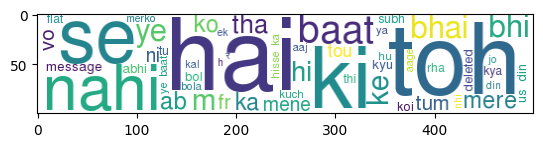

In [163]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud(width=500,height=100,min_font_size=10,background_color='white',font_path='gargi.ttf')
df = df[df['user']==' Pratham jain CGC']
df = df[df['message']!='<Media omitted>\n']
df = df[df['message'] != '\u200eimage omitted\n']
df = df[df['message']!='\u200esticker omitted\n']

df_wc = wc.generate(df['message'].str.cat(sep=" "))
plt.imshow(df_wc)